In [1]:
### REGRESSION ###
# This python file explains the effect of different regression models on bias and variance 
# To illustrate the above mentioned case we used Bike sharing dataset obtained from UCI machine learning repository
# The dataset contains 731 datasamples and 14 atrributes


In [2]:
# Importing the necessary libraries  
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_log_error, explained_variance_score
import statistics
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: MacOSX


In [3]:
# Reading the csv
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2/1/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3/1/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4/1/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5/1/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Setting the feature and target
X = df.drop(['cnt','dteday','instant'],axis =1)
Y = df[['cnt']]
X.head()
Y.head()
X = X.values
Y = Y.values
Y=Y.ravel()

In [5]:
# Initializing the variables
n_split = 20

error_knn = []
var_knn = []

error_rf = []
var_rf = []

error_ada = []
var_ada = []

error_poly = []
var_poly = []

bias = []
variance = []
variance_score = []

variance_all = []


In [6]:
# Polynomial Regressor
for train, test in KFold(n_splits=n_split, shuffle=True).split(X,Y):
        x_train, x_test = X[train], X[test]
        y_train, y_test = Y[train], Y[test]

        model_poly = make_pipeline(PolynomialFeatures(5, include_bias = True), Ridge())
        model_poly.fit(x_train, y_train)
        pred_poly = model_poly.predict(x_test)
        error_poly.append(mean_squared_log_error(y_test, pred_poly, multioutput='uniform_average'))
        var_poly.append(explained_variance_score(y_test, pred_poly, multioutput='uniform_average'))
# Bias
bias.append(sum(error_poly)/len(error_poly))  
# Variance
error_poly_sqr = []
for i in error_poly:
    a = np.square(i)
    error_poly_sqr.append(a)
variance_all.append((sum(error_poly_sqr)/(n_split-1))-np.square(np.mean(error_poly)))

/Users/reshika/cs20/.env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/reshika/cs20/.env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:169: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  dual_coef = linalg.lstsq(K, y)[0]
/Users/reshika/cs20/.env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/reshika/cs20/.env/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares 

In [7]:
# K Nearest Regressor
for train, test in KFold(n_splits=n_split, shuffle=True).split(X,Y):
        x_train, x_test = X[train], X[test]
        y_train, y_test = Y[train], Y[test]

        model_knn = KNeighborsRegressor(n_neighbors=200, weights='distance', algorithm='auto', leaf_size=10, p=1, metric='minkowski', )
        model_knn.fit(x_train, y_train)
        pred_knn = model_knn.predict(x_test)
        error_knn.append(mean_squared_log_error(y_test, pred_knn, multioutput='uniform_average'))
        var_knn.append(explained_variance_score(y_test, pred_knn, multioutput='uniform_average'))
# Bias
bias.append(sum(error_knn)/len(error_knn))
# Variance
error_knn_sqr = []
for i in error_knn:
    a = np.square(i)
    error_knn_sqr.append(a)
variance_all.append((sum(error_knn_sqr)/(n_split-1))-np.square(np.mean(error_knn)))



In [8]:
# Random Forest
for train, test in KFold(n_splits=n_split, shuffle=True).split(X,Y):
        x_train, x_test = X[train], X[test]
        y_train, y_test = Y[train], Y[test]

        model_rf = RandomForestRegressor(n_estimators=20, criterion='mae',max_depth = 3, max_leaf_nodes= 9, max_features=10)
        model_rf.fit(x_train, y_train)
        pred_rf = model_rf.predict(x_test)
        error_rf.append(mean_squared_log_error(y_test, pred_rf, multioutput='uniform_average'))
        var_rf.append(explained_variance_score(y_test, pred_rf, multioutput='uniform_average'))
# Bias
bias.append(sum(error_rf)/len(error_rf))
# Variance 
error_rf_sqr = []
for i in error_rf:
    a = np.square(i)
    error_rf_sqr.append(a)
variance_all.append((sum(error_rf_sqr)/(n_split-1))-np.square(np.mean(error_rf)))



In [9]:
# Ada Boost
for train, test in KFold(n_splits=n_split, shuffle=True).split(X,Y):
        x_train, x_test = X[train], X[test]
        y_train, y_test = Y[train], Y[test]
        
        model_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=1)
        model_ada.fit(x_train, y_train)
        pred_ada = model_ada.predict(x_test)
        error_ada.append(mean_squared_log_error(y_test, pred_ada, multioutput='uniform_average'))
        var_ada.append(explained_variance_score(y_test, pred_ada, multioutput='uniform_average'))
# Bias
bias.append(sum(error_ada)/len(error_ada))
# Variance
error_ada_sqr = []
for i in error_ada:
    a = np.square(i)
    error_ada_sqr.append(a)
variance_all.append((sum(error_ada_sqr)/(n_split-1))-np.square(np.mean(error_ada)))

In [10]:
# Printing the Bias
print("Bias and Variance for all are:\t ", bias, '\n', variance_all)

Bias and Variance for all are:	  [0.07420592591351552, 0.045534970249520315, 0.042922330766256026, 0.030498640576223722] 
 [0.015674572555773092, 0.012887606017617405, 0.01228489983260889, 0.008114213628262692]


In [11]:
sc = preprocessing.MaxAbsScaler()
bias = np.array(bias)
variance_all = np.array(variance_all)
# scaling the bias 
bias = sc.fit_transform(bias.reshape(-1,1)) 
variance_all = sc.fit_transform(variance_all.reshape(-1,1))
print("Bias\n",bias)
print("Variance\n",variance_all)

Bias
 [[1.        ]
 [0.61362984]
 [0.57842187]
 [0.41100007]]
Variance
 [[1.        ]
 [0.82219824]
 [0.78374704]
 [0.5176673 ]]


bias [1.0, 0.6136298373608299, 0.578421874504747, 0.4110000677273248]
variance [1.0, 0.8221982431585211, 0.7837470392826914, 0.517667298383467]


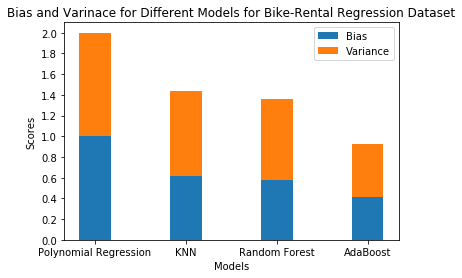

In [12]:
#### BIAS VARIANCE GRAPH ####
bias_ = []
for sublist in bias:
    for item in sublist:
        bias_.append(item)
        
variance_ = []
for sublist in variance_all:
    for item in sublist:
        variance_.append(item)

print("bias",bias_)
print("variance",variance_)
N = 4
# bias_ = (1,0.56977835,0.40359974 ,0.25655156 )
# variance_ = (1,0.84012563,0.88135767,0.35672788)
# the x locations for the groups
ind = np.arange(N)  
# the width of the bars: can also be len(x) sequence
width = 0.35       

p1 = plt.bar(ind, bias_, width,)
p2 = plt.bar(ind, variance_, width,bottom=bias_)

plt.title("Bias and Varinace for Different Models for Bike-Rental Regression Dataset")
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(ind, ('Polynomial Regression','KNN', 'Random Forest','AdaBoost'))
plt.yticks(np.arange(0, 2.2, 0.2))
plt.legend((p1[0], p2[0]), ('Bias', 'Variance'))
plt.savefig("Graph_Reshika.png",dpi=250)
plt.show()